In [1]:

# # <p style="text-align: center;"> Names </p>
# ## <p style="text-align: center;"> AI S1,S2 </p>
# | <font size="4"> Name  </font> | <font size="4">  ID  </font>|
# | --- | --- |
# | <font size="4"> Ahmed Rushdi Mohammed </font> | <font size="4"> 20180008 </font>  |
# |  <font size="4"> Mohammed Waleed Mohammed </font> | <font size="4"> 20180244 </font>  |
# |  <font size="4"> Aoss Maged Sultan</font> | <font size="4"> 20180432 </font>  |
#
# # Phase 1
#
# ### 1. Load Dataset

In [2]:

from sklearn.svm import SVR
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

In [3]:


path = 'D:\\Study_code\\py\\ML\\phase1\\insurance.csv'
df = pd.read_csv(path)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


# # Phase 2
# ### Handle Empty cells

In [4]:


df.isnull().sum()


# df contains no null values

#  ### Encoding

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:


ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(categories='auto'), [1, 3, 4, 5])],
    remainder='passthrough'
)
X = ct.fit_transform(X)

# One hot encode the data

# ### Train-test Split

In [6]:


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=44, shuffle=True)


# ### Plot Train Data

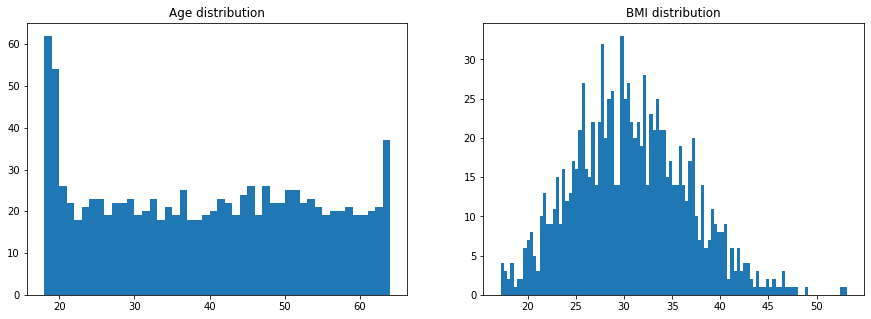

In [7]:


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.hist(X_train[:, 14], bins=46)
ax2.hist(X_train[:, 15], bins=int(len(X_train[:, 12])/10))
ax1.set_title('Age distribution')
ax2.set_title('BMI distribution')
plt.show()


# # Phase 3
# ## Applying Models
# ### Multiple linear regression

In [8]:


model1 = LinearRegression()
model1.fit(X_train, y_train)
z=model1.score(X_test, y_test)
print(z)
predict = model1.predict(X_test)
print(predict[0:10])
print(y_test[0:10])

# ### Polynomial regression

0.7537256057742427
[ 7326.48464383  3977.51303006 10358.37402186 29056.04558976
  7159.47049712  1438.65757016 32971.62195056 36450.28642506
 27477.03889799  8049.10523093]
[ 4738.2682   2055.3249   7445.918   19361.9988   2755.02095  2709.1119
 39241.442   42560.4304  34779.615    6500.2359 ]


In [9]:


poly_reg = PolynomialFeatures(degree=2)
model2 = LinearRegression()
model2.fit(poly_reg.fit_transform(X_train), y_train)
z=model2.score(poly_reg.fit_transform(X_test), y_test)
predict=model2.predict(poly_reg.fit_transform(X_test))
print(z)
print(predict[0:10])
print(y_test[0:10])


# ### Support Vector Regression
model3 = SVR(kernel = 'linear' , C=20 , epsilon=0.01)
model3.fit(X_train, y_train)
z=model3.score(X_test,y_test)
predict = model3.predict(X_test)
print(z)
print(predict[0:10])
print(y_test[0:10])

0.8337980871959784
[ 7092.28442383  2450.98461914  8971.63745117 20550.45532227
  5435.88061523  4191.22753906 41705.9206543  41869.06225586
 35236.88574219  8449.4855957 ]
[ 4738.2682   2055.3249   7445.918   19361.9988   2755.02095  2709.1119
 39241.442   42560.4304  34779.615    6500.2359 ]
0.35037603124265604
[ 5128.82175997  2361.4289204   8179.39264531 15420.64838627
  2988.24752346  1914.59340315 13488.76019032 17101.40879183
 10102.42537464  7367.46811652]
[ 4738.2682   2055.3249   7445.918   19361.9988   2755.02095  2709.1119
 39241.442   42560.4304  34779.615    6500.2359 ]
